In [2]:
import numpy as np
import matplotlib.pyplot as plt

def pivot_on(a, row, col):
    pivot = a[row][col]
    for j in range(a.shape[1]):
        a[row][j] /= pivot
    for i in range(a.shape[0]):
        if i == row:
            continue
        mult = a[i][col]
        for j in range(a.shape[1]):
            a[i][j] -= mult * a[row][j]


def find_pivot_col(a):
    pivot_col = 1
    lowest = a[0][pivot_col]
    for j in range(1, a.shape[1]):
        if a[0][j] < lowest:
            lowest = a[0][j]
            pivot_col = j
    if lowest >= 0:
        return -1
    return pivot_col


def find_pivot_row(a, pivot_col):
    pivot_row = 0
    min_ratio = -1.0
    for i in range(1, a.shape[0]):
        ratio = a[i][0] / a[i][pivot_col]
        if (0 < ratio < min_ratio) or min_ratio < 0:
            min_ratio = ratio
            pivot_row = i
    if min_ratio < 0:
        return -1
    return pivot_row


def add_slack_var(a):
    I = np.vstack((np.zeros(a.shape[1]), np.eye(a.shape[0])))
    b = np.array([1, ] * (a.shape[0] + 1)).reshape(a.shape[0] + 1, -1)
    b[0][0] = 0
    c = np.array([-1, ] * a.shape[1])
    a = np.vstack((c, a))
    a = np.hstack((b, a))
    a = np.hstack((a, I))
    return a


def check_b_positive(a):
    for i in range(1, a.shape[0]):
        assert(a[i][0] == 1)


def find_basis_variable(a, col):
    xi = -1
    for i in range(1, a.shape[0]):
        if a[i][col] == 1:
            if xi == -1:
                xi = i
            else:
                return -1
        else:
            if a[i][col] != 0:
                return -1
    return xi


def optimal_strategy(a, b):
    p = []
    q = []
    for j in range(1, a.shape[1]):
        xi = find_basis_variable(a, j)
        if xi != -1:
            if j < a.shape[0]:
                q.append(a[xi][0])
            else:
                p.append(a[0][j])
        else:
            if j < a.shape[0]:
                q.append(0)
            else:
                p.append(a[0][j])
    sum1 = sum(q)
    sum2 = sum(p)
    for i in range(len(q)):
        q[i] /= sum1
    for i in range(len(p)):
        p[i] /= sum2
    return p, q, 1 / sum1 - b


def nash_equilibrium(a):
    loop = 1
    min_val = a.min()
    b = 0
    if min_val <= 0:
        b = -min_val + 1
        a = a + b
    a = add_slack_var(a)
    check_b_positive(a)
    while loop:
        pivot_col = find_pivot_col(a)
        if pivot_col < 0:
            p, q, s = optimal_strategy(a, b)
            return p, q, s
        pivot_row = find_pivot_row(a, pivot_col)
        if pivot_row < 0:
            print('(no pivot row')
            break
        pivot_on(a, pivot_row, pivot_col)
        if loop > 20:
            print('Too many iterations')
            break
        loop += 1

        
def visualization(p):
    x = np.linspace(1, len(p), len(p) )
    
    plt.axis([0, len(p) + 1, 0, max(p) + 1/2]) 
    plt.style.use('ggplot')
    plt.stem(x, p, use_line_collection=True, basefmt=' ')
    plt.show()
        

def main(a = None):
    if a is None:
        n = int(input())
        m = int(input())
        a = []
        for i in range(n):
            a.append([])
        for j in range(m):
            a[j] = list(map(int, input().split()))
        a = np.array(a)
    p, q, s = nash_equilibrium(a)
    visualization(p)
    visualization(q)
    print('\n Game value is :', s,
          '\n optimal strategy for 1st player : ', p,
          '\n optimal strategy for 2nd player : ', q)


if __name__ == "__main__":
    main()

# Examples

## 1. Nash Equilibrium in Pure Strategies

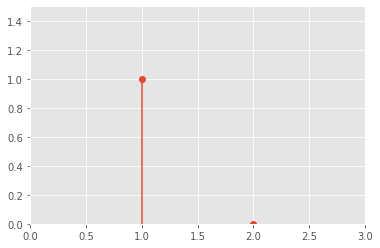

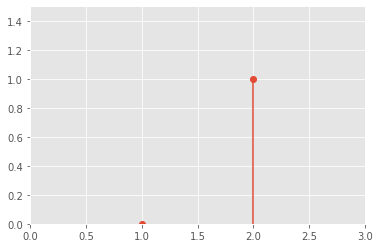


 Game value is : 0.0 
 optimal strategy for 1st player :  [1.0, 0.0] 
 optimal strategy for 2nd player :  [0.0, 1.0]


In [4]:
a = np.array([[5,0],
               [6,0]])

main(a)

## 2. The spectrum of optimal strategy is incomplete

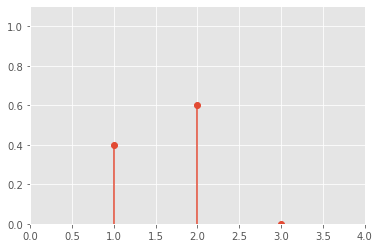

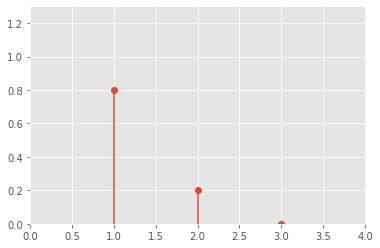


 Game value is : 5.6 
 optimal strategy for 1st player :  [0.4, 0.6, 0.0] 
 optimal strategy for 2nd player :  [0.7999999999999999, 0.20000000000000004, 0.0]


In [5]:
a = np.array([[5, 8, 10],
              [6, 4, 10],
              [0, 0, 0]])
main(a)

## 3. The spectrum of optimal strategy is full

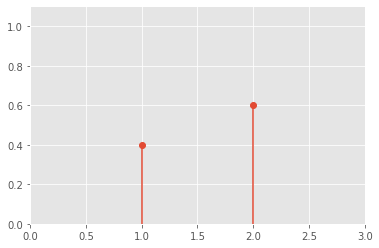

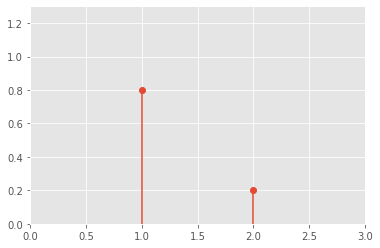


 Game value is : 5.6 
 optimal strategy for 1st player :  [0.4, 0.6] 
 optimal strategy for 2nd player :  [0.7999999999999999, 0.20000000000000007]


In [6]:
a = np.array([[5, 8],
              [6, 4]])
main(a)